# Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

## Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### 1. Import the necessary libraries.

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

### 3. First look at its main features (head, shape, info).

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [171]:
customer_df = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 4. Rename the columns so they follow the PE8 (snake case).

In [37]:
# Renaming
customer_df = customer_df.rename(columns={'EmploymentStatus':'Employment Status'})

### 5. Change effective to date column to datetime format.

In [38]:
# Changing effective to date column to datetime format
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])
customer_df.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
Employment Status                        object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

### 6. Check NaN values per column.

In [40]:
# Checking NaN values
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
Employment Status                0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

### 7. Define a function that differentiates between continuous and discrete variables. 
Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

- A continuous variable is a variable whose value is obtained by measuring. (the data can only be numeric)
- A discrete variable is a variable whose value is obtained by counting. (no decimals, particular values) (you CAN'T draw a line)

In [74]:
# First, I will split the data into numerical and categorical
# Numericals
numericals = pd.DataFrame(customer_df.select_dtypes(np.number))
categorical = customer_df.select_dtypes(np.object)

numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [75]:
numericals.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

In [70]:
# Rounding to 2 decimals CLValue and TCAmount
# numericals = list(map(lambda x: round(x,2), customer_df['Total Claim Amount']))
numericals = list(map(lambda x: round(x,2), customer_df['Customer Lifetime Value']))

In [181]:
# Checking unique values for the different numerical columns (.uniques)
print(numericals['Total Claim Amount'].unique())
#numericals['Income'].value_counts()
numericals['Income'].value_counts()
# etc.

# Continuous variables: 'Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount'
# Discrete numerical variables: 'Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies'

[ 384.811147 1131.464935  566.472247 ...  541.282007  198.234764
  790.784983]


0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: Income, Length: 5694, dtype: int64

In [91]:
# float -> continuous
# int -> discrete
# object -> categorical

# Defining the function to differentiate between continuous and discrete variables
#def continuous(x):
# def function(x):
  #  if len(x.value_counts()) > 1000:
   #     return 'Continuous Data'
    #else:
     #   return 'Discrete Data'

# X.apply(function)
# discrete_df = X.drop(['Customer_Lifetime_Value','Income','Total_Claim_Amount'], axis=1)
# discrete_df.head()
# continuous_df = X.loc[:,['Customer_Lifetime_Value','Income','Total_Claim_Amount']]
# continuous_df.head()*

In [92]:
# Discrete-continuous split
continuous = numericals[['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount']]
discrete = numericals[['Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies']]

### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [93]:
# CATEGORICAL. 
categorical.head()

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [94]:
# Checking the different categorical values so we would need to clean
#some text from it
categorical['Policy Type'].value_counts()
# etc.

# We can One Hot Encode: Response, Coverage, Gender, ...

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [95]:
# Policy Type
# We can clean the 'Auto' text from the Policy Type values by defining a function
def cleanpolicytype(x):
    if 'Personal Auto' in x:
        return "Personal"
    elif 'Corporate Auto' in x:
        return "Corporate"
    else:
        return "Special"

In [96]:
categorical['Policy Type'] = categorical['Policy Type'].apply(cleanpolicytype)
categorical['Policy Type'].value_counts()

<ipython-input-96-f10be10537cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Policy Type'] = categorical['Policy Type'].apply(cleanpolicytype)


Personal     6788
Corporate    1968
Special       378
Name: Policy Type, dtype: int64

In [97]:
categorical['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [98]:
# Offer Type column
# We can clean the 'Offer' text from the Renew Offer Type column 
# values by defining a function which cleans 'Offer'
def cleanoffertype(x):
    if 'Offer1' in x:
        return "1"
    elif 'Offer2' in x:
        return "2"
    elif 'Offer3' in x:
        return "3"
    else:
        return "4"
    
categorical['Renew Offer Type'] = categorical['Renew Offer Type'].apply(cleanoffertype)
categorical['Renew Offer Type'].value_counts()

<ipython-input-98-2d9a558b130c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Renew Offer Type'] = categorical['Renew Offer Type'].apply(cleanoffertype)


1    3752
2    2926
3    1432
4    1024
Name: Renew Offer Type, dtype: int64

In [99]:
# Policy column: we can drop the 'Policy Type' column as it
#shows the same information as in the 'Policy column

In [100]:
categorical['Policy'].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [101]:
categorical['Policy Type'].value_counts(dropna=False)

Personal     6788
Corporate    1968
Special       378
Name: Policy Type, dtype: int64

In [102]:
categorical = categorical.drop(['Policy Type'],axis=1)

In [103]:
categorical

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,3,Branch,Four-Door Car,Large


### 9. Get categorical features.

In [104]:
#If our objective is to retain customers, our categorical variables Label
# should be 'Coverage'. 

In [105]:
# X-y categorical split

y_categorical = categorical['Coverage']
X_categorical = categorical.drop(['Coverage'], axis=1)

In [106]:
# However, if we need to identify a Label/target for our whole data set,
#this would be 'Total Claim Amount'. So, we would use the whole categorical
#set to start building our model, etc.

### 10. What should we do with the customer_id column?

In [107]:
customer_df['Customer'].value_counts()

JR84006    1
NY91328    1
QD97878    1
CV86445    1
RZ79717    1
          ..
BV16459    1
LF94282    1
PV55726    1
OE75231    1
LZ26801    1
Name: Customer, Length: 9134, dtype: int64

In [108]:
# Should we delete the two first letters as we can't infere nothing
#about them?

# Lab | Cleaning categorical data

### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [109]:
continuous_df = pd.DataFrame(continuous)
discrete_df = pd.DataFrame(discrete)

### 3.Plot a correlation matrix, what can you see?

In [110]:
c_correlation_matrix = continuous_df.corr()
c_correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.226451
Income,0.024366,1.000000,-0.016665,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.632017
Total Claim Amount,0.226451,-0.355254,0.632017,1.000000


In [111]:
d_correlation_matrix = discrete_df.corr()
d_correlation_matrix

,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Months Since Last Claim,1.000000,-0.042959,0.005354,0.009136
Months Since Policy Inception,-0.042959,1.000000,-0.001158,-0.013333
Number of Open Complaints,0.005354,-0.001158,1.000000,0.001498
Number of Policies,0.009136,-0.013333,0.001498,1.000000


All features have low correlation between each other minus w/ Total Claim Amount which at the end is our Label variable.

### 4. Create a function to plot every discrete variables. 
Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

### 5.What can you see in the plots?

### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

<AxesSubplot:>

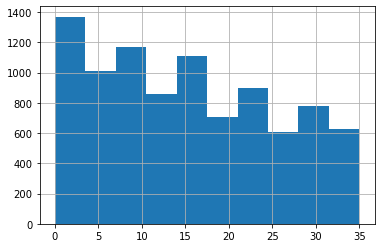

/Users/joangalibrull/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


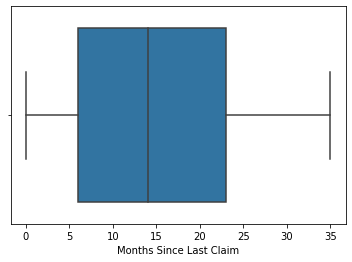

In [112]:
# DISCRETE
display(discrete_df['Months Since Last Claim'].hist())
plt.show()

sns.boxplot(discrete_df['Months Since Last Claim'])
plt.show()

<AxesSubplot:>

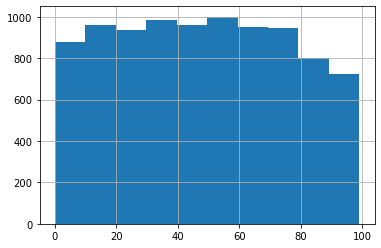

In [113]:
display(discrete_df['Months Since Policy Inception'].hist())

<AxesSubplot:>

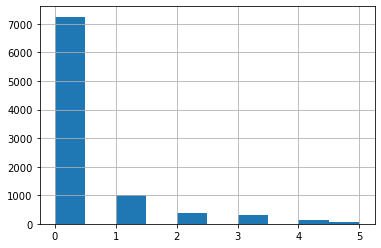

/Users/joangalibrull/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


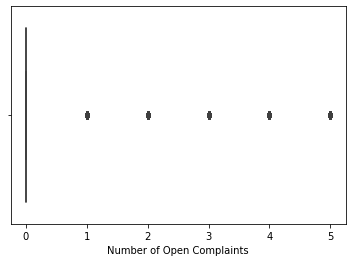

In [114]:
display(discrete_df['Number of Open Complaints'].hist())
plt.show()

sns.boxplot(discrete_df['Number of Open Complaints'])
plt.show()

<AxesSubplot:>

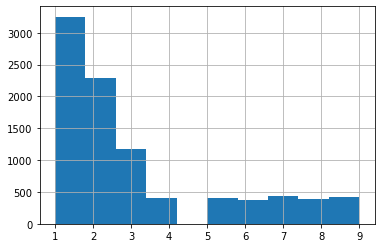

In [115]:
display(discrete_df['Number of Policies'].hist())
plt.show()

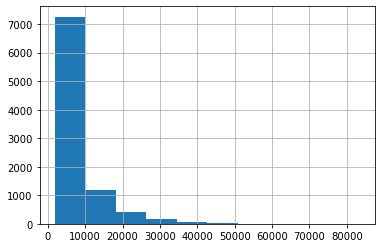

/Users/joangalibrull/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


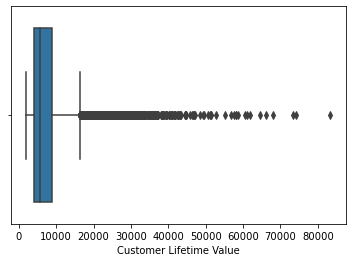

In [116]:
# CONTINUOUS
continuous_df['Customer Lifetime Value'].hist()
plt.show()

sns.boxplot(continuous_df['Customer Lifetime Value'])
plt.show()

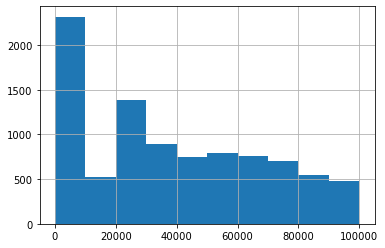

/Users/joangalibrull/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


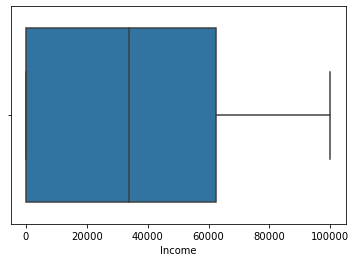

In [117]:
continuous_df['Income'].hist()
plt.show()

sns.boxplot(continuous_df['Income'])
plt.show()

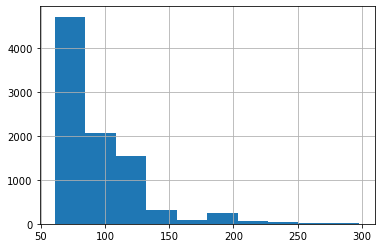

/Users/joangalibrull/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


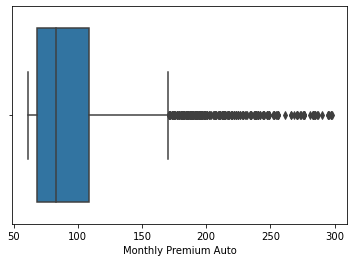

In [118]:
continuous_df['Monthly Premium Auto'].hist()
plt.show()

sns.boxplot(continuous_df['Monthly Premium Auto'])
plt.show()

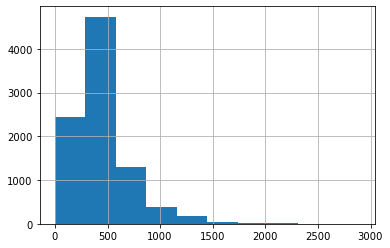

/Users/joangalibrull/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


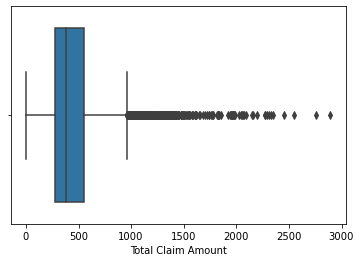

In [119]:
continuous_df['Total Claim Amount'].hist()
plt.show()

sns.boxplot(continuous_df['Total Claim Amount'])
plt.show()

### 7. Have you found outliers? If you have, what should we do with them?

In [120]:
# We will Log transform the values of the CLV column to reinforce the small 
#values

def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return x

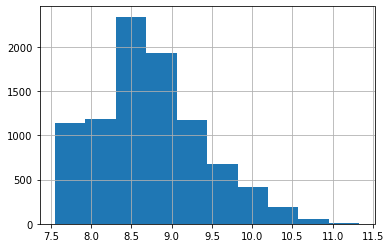

In [121]:
pd.Series(continuous_df['Customer Lifetime Value'].apply(log_transfom_clean)).hist()
plt.show()

### 8. Check nan values per column.

In [124]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
Employment Status                0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

# Lab | Feature extraction

### 1. Open the categoricals variable we created before.

In [125]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [126]:
categoricals['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

### 2. Plot all the categorical variables with the proper plot. What can you see?

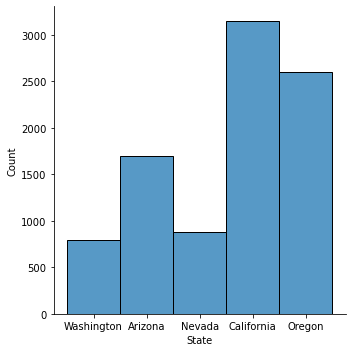

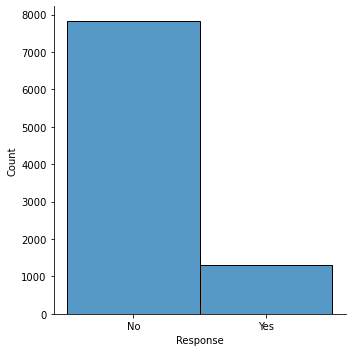

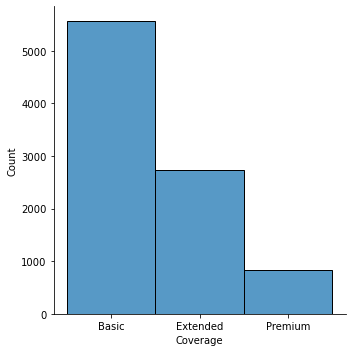

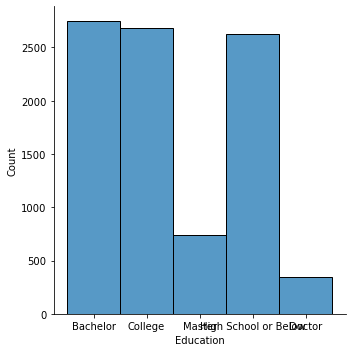

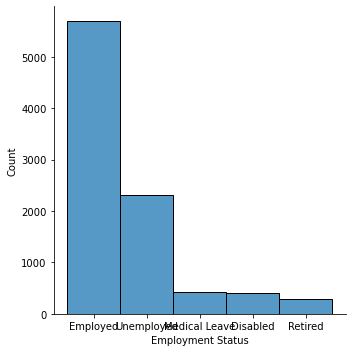

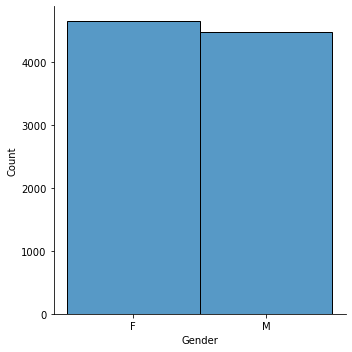

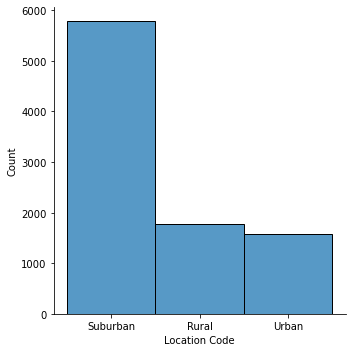

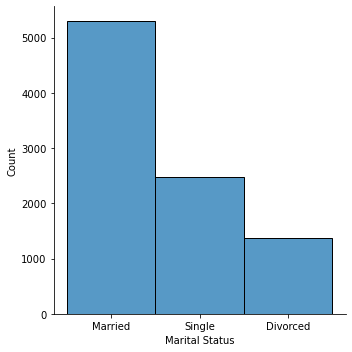

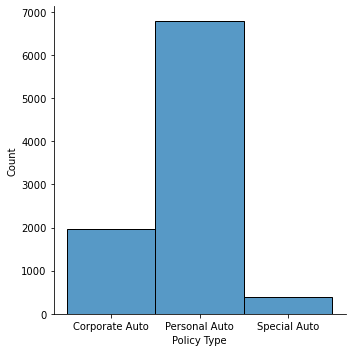

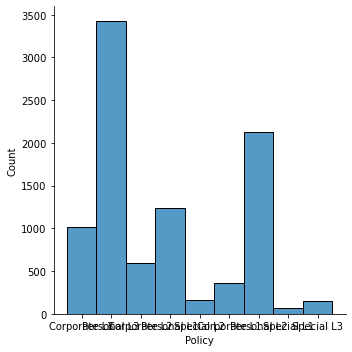

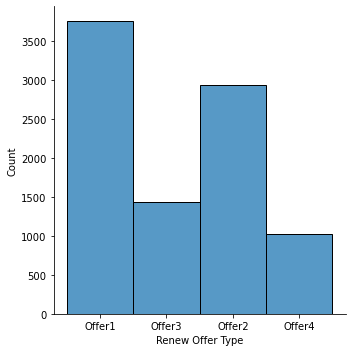

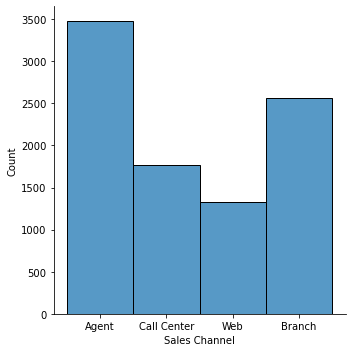

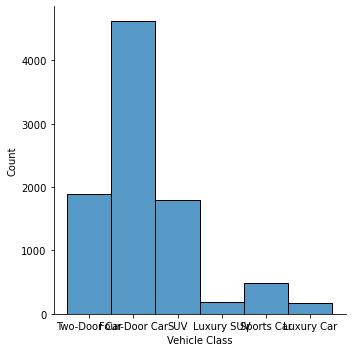

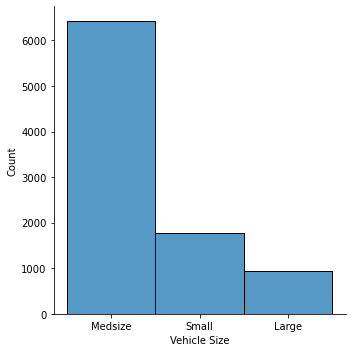

In [127]:
sns.displot(categoricals['State'])
plt.show()

sns.displot(categoricals['Response'])
plt.show()

sns.displot(categoricals['Coverage'])
plt.show()

sns.displot(categoricals['Education'])
plt.show()

sns.displot(categoricals['Employment Status'])
plt.show()

sns.displot(categoricals['Gender'])
plt.show()

sns.displot(categoricals['Location Code'])
plt.show()

sns.displot(categoricals['Marital Status'])
plt.show()

sns.displot(categoricals['Policy Type'])
plt.show()

sns.displot(categoricals['Policy'])
plt.show()

sns.displot(categoricals['Renew Offer Type'])
plt.show()

sns.displot(categoricals['Sales Channel'])
plt.show()

sns.displot(categoricals['Vehicle Class'])
plt.show()

sns.displot(categoricals['Vehicle Size'])
plt.show()

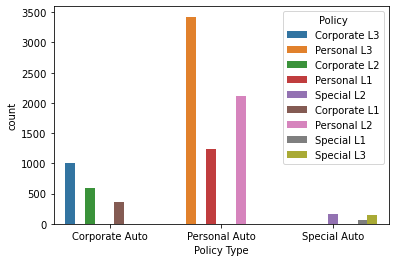

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ax2 = sns.countplot(x='Policy Type', data=categoricals, hue='Policy')

In [133]:
# Or:

# categorical_df = categorical_df.drop(['Customer'], axis=1)
# for i in range(len(categorical_df.columns)):
  #      sns.countplot(categorical_df.iloc[:,i])
   #     plt.show()

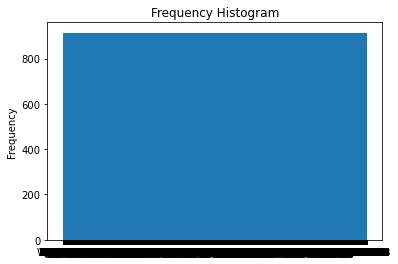

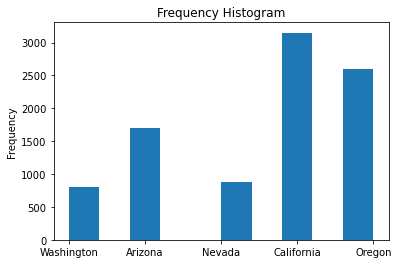

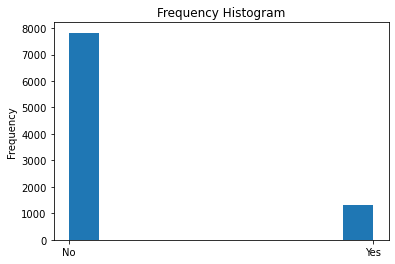

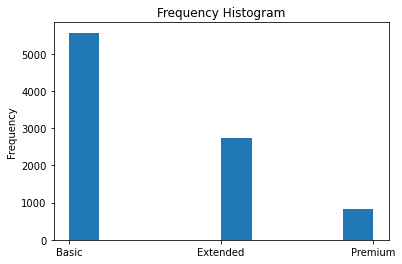

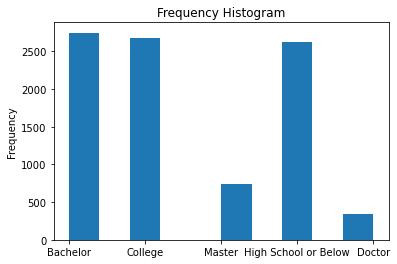

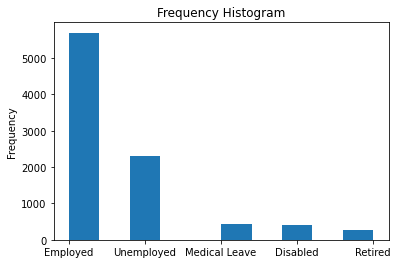

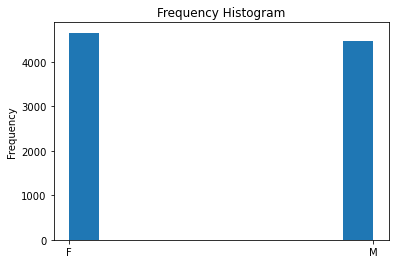

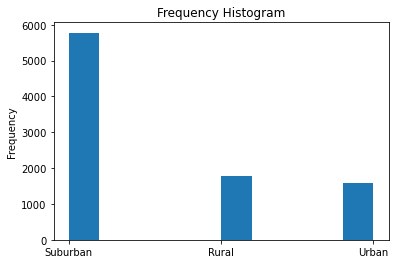

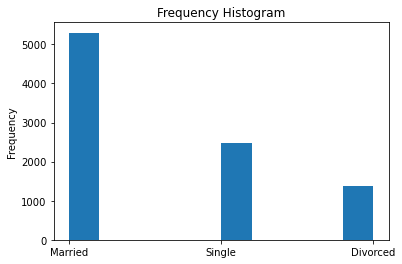

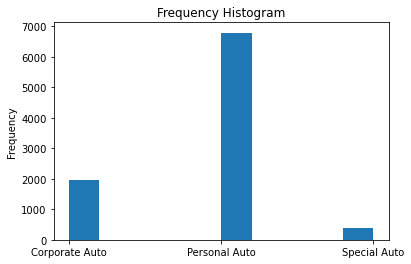

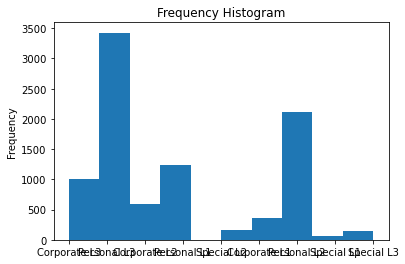

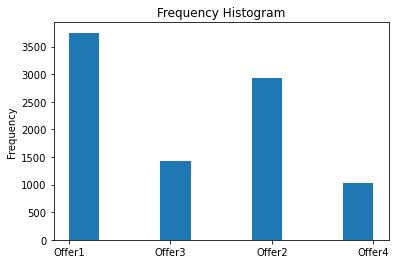

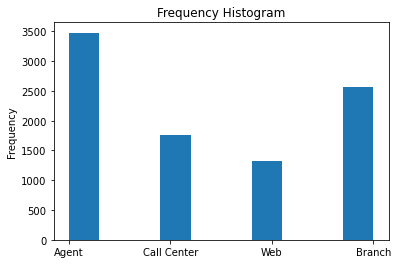

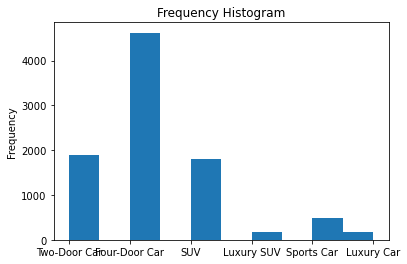

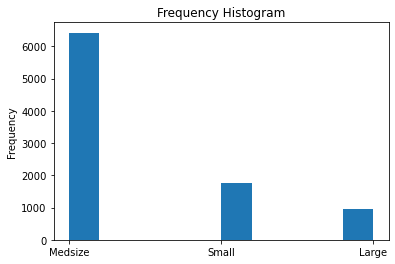

In [134]:
# Or:
%matplotlib inline
col_names_cat = categoricals.columns.tolist()
len(col_names_cat)
col_names_cat
def plot_cat(df):
    for i in range(len(col_names_cat)):
        plt.hist(df.iloc[:,i])
        plt.gca().set(title=num_names_cat[i], ylabel='Frequency')
        plt.show()
        
plot_cat(categoricals)

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [149]:
categoricals = pd.DataFrame(categoricals)
categoricals.head()

,Customer,State,Response,Coverage,Employment Status,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [152]:
# (NOTE FOR MIGUEL: I did this step before the Day 2 afternoon session so I
#subjectively droped these two)

# We can drop the 'Education' and 'Policy Type' for the moment
# as they are redundant.
#categoricals = categoricals.drop(['Education','Policy Type'], axis=1)
categoricals.head(2)

,Customer,State,Response,Coverage,Employment Status,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [ ]:
# Checking P-values for several columns that subjectively I think
# may be dependent, so I may be able to drop them.

# Reminder: if independent, keep them. If dependent, drop.

In [193]:
# Checking Coverage-Employment Status dependency
import scipy.stats as st

data_crosstab = pd.crosstab(categoricals['Coverage'], categoricals['Employment Status'], margins = False)
                                                                            # margins = False, means that I do not want the Total values    
st.chi2_contingency(data_crosstab)

(21.766566563493097,
 0.005367160028585107,
 8,
 array([[ 246.88416904, 3473.44690169,  263.34311364,  171.90453252,
         1412.42128312],
        [ 121.57981169, 1710.52288154,  129.68513247,   84.65557259,
          695.55660171],
        [  36.53601927,  514.03021677,   38.97175389,   25.4398949 ,
          209.02211517]]))

In [ ]:
# P-value < 0.05, should drop 'Employment Status'

In [194]:
# Checking Coverage-Marital Status dependency
import scipy.stats as st

data_crosstab = pd.crosstab(categoricals['Coverage'], categoricals['Marital Status'], margins = False)
                                                                            # margins = False, means that I do not want the Total values    
st.chi2_contingency(data_crosstab)

(1.5917156364713243,
 0.810280319861366,
 4,
 array([[ 834.52945041, 3229.61068535, 1503.85986424],
        [ 410.96978323, 1590.44405518,  740.58616159],
        [ 123.50076637,  477.94525947,  222.55397416]]))

In [195]:
# P-value > 0.05, keep

In [196]:
# Checking Coverage-Renew Offer Type dependency
import scipy.stats as st

data_crosstab = pd.crosstab(categoricals['Coverage'], categoricals['Renew Offer Type'], margins = False)
                                                                            # margins = False, means that I do not want the Total values    
st.chi2_contingency(data_crosstab)

(43.67369351369571,
 8.579306403138595e-08,
 6,
 array([[2287.18370922, 1783.66192249,  872.93365448,  624.22071382],
        [1126.33939129,  878.37661485,  429.88219838,  307.40179549],
        [ 338.4768995 ,  263.96146267,  129.18414714,   92.37749069]]))

In [197]:
# P-value < 0.05, should drop 'Renew Offer Type'

In [198]:
# Checking Vehicle Class-Vehicle Size dependency
import scipy.stats as st

data_crosstab = pd.crosstab(categoricals['Vehicle Class'], categoricals['Vehicle Size'], margins = False)
                                                                            # margins = False, means that I do not want the Total values    
st.chi2_contingency(data_crosstab)

(24.66171915875752,
 0.006024951458906972,
 10,
 array([[ 478.59273046, 3249.97854171,  892.42872783],
        [  16.88176046,  114.63893146,   31.47930808],
        [  19.05671119,  129.40836435,   35.53492446],
        [ 186.01007226, 1263.1381651 ,  346.85176265],
        [  50.12743595,  340.40026275,   93.47230129],
        [ 195.33128969, 1326.43573462,  364.2329757 ]]))

In [199]:
# P-value < 0.05, should drop 'Vehicle Size'

In [200]:
# Checking State-Location Code dependency
import scipy.stats as st

data_crosstab = pd.crosstab(categoricals['State'], categoricals['Location Code'], margins = False)
                                                                            # margins = False, means that I do not want the Total values    
st.chi2_contingency(data_crosstab)

(1.2593534036339677,
 0.9960201469631593,
 8,
 array([[ 330.56919203, 1077.4728487 ,  294.95795927],
        [ 611.4462448 , 1992.97679002,  545.57696519],
        [ 171.20494854,  558.0335012 ,  152.76155025],
        [ 504.87989928, 1645.62940661,  450.49069411],
        [ 154.89971535,  504.88745347,  138.21283118]]))

In [202]:
# P-value > 0.05, keep

In [204]:
# Dropping redundant categorical columns
categoricals = categoricals.drop(['Employment Status','Renew Offer Type','Vehicle Size'], axis=1)
categoricals.head()

,Customer,State,Response,Coverage,Gender,Location Code,Marital Status,Policy,Sales Channel,Vehicle Class
0,BU79786,Washington,No,Basic,F,Suburban,Married,Corporate L3,Agent,Two-Door Car
1,QZ44356,Arizona,No,Extended,F,Suburban,Single,Personal L3,Agent,Four-Door Car
2,AI49188,Nevada,No,Premium,F,Suburban,Married,Personal L3,Agent,Two-Door Car
3,WW63253,California,No,Basic,M,Suburban,Married,Corporate L2,Call Center,SUV
4,HB64268,Washington,No,Basic,M,Rural,Single,Personal L1,Agent,Four-Door Car


### 4. Plot time variable. Can you extract something from it?

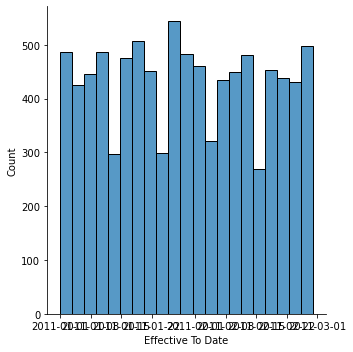

In [147]:
sns.displot(customer_df['Effective To Date'])
plt.show()

We can extract that the coverage type of each customer is being renewed or contracted in a continuous time matter with only 4 low peaks out of 20. It shows how the company has been consistent at acquiring customers for their services.


# Lab | Data cleaning and wrangling

### 1. We will start with removing outliers. 
So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [172]:
# Removing outliers for the following columns: Monthly Premium Auto, Customer Liftime Value,

def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return x

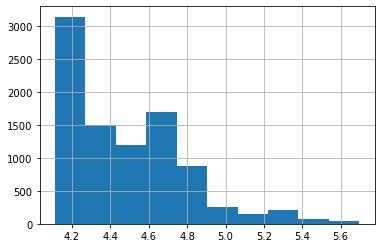

In [173]:
pd.Series(customer_df['Monthly Premium Auto'].apply(log_transfom_clean)).hist()
plt.show()

In [174]:
# We still have outliers in the 5.6 and too many values in the 25th percentile

iqr = np.percentile(customer_df['Monthly Premium Auto'],75) - np.percentile(customer_df['Monthly Premium Auto'],25)

upper_limit = np.percentile(customer_df['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df['Monthly Premium Auto'],25) - 1.5*iqr       

print(upper_limit)
print(lower_limit)

170.5
6.5


In [175]:
customer_df = customer_df[(customer_df['Monthly Premium Auto']<upper_limit)]
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<AxesSubplot:>

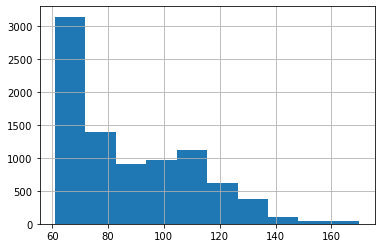

In [176]:
customer_df['Monthly Premium Auto'].hist()

In [211]:
# Concatenating cleaned numerical and categorical data
customers_df_n = pd.concat([numericals,categoricals], axis=1)
customers_df_n.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer,State,Response,Coverage,Gender,Location Code,Marital Status,Policy,Sales Channel,Vehicle Class
0,2763.519279,56274,69,32,5,0,1,384.811147,BU79786,Washington,No,Basic,F,Suburban,Married,Corporate L3,Agent,Two-Door Car
1,6979.535903,0,94,13,42,0,8,1131.464935,QZ44356,Arizona,No,Extended,F,Suburban,Single,Personal L3,Agent,Four-Door Car
2,12887.431650,48767,108,18,38,0,2,566.472247,AI49188,Nevada,No,Premium,F,Suburban,Married,Personal L3,Agent,Two-Door Car
3,7645.861827,0,106,18,65,0,7,529.881344,WW63253,California,No,Basic,M,Suburban,Married,Corporate L2,Call Center,SUV
4,2813.692575,43836,73,12,44,0,1,138.130879,HB64268,Washington,No,Basic,M,Rural,Single,Personal L1,Agent,Four-Door Car


In [212]:
# X-y split for our cleaned cleaned data
X = customers_df_n.drop(['Total Claim Amount'],axis=1)
y = customers_df_n['Total Claim Amount']

### 2. Create a copy of the dataframe for the data wrangling.

In [177]:
data = customer_df

### 3. Normalize the continuous variables. You can use any one method you want.

In [205]:
# Defining the function to differentiate between continuous and discrete variables
#def continuous(x):
def function(x):
    if len(x.value_counts()) > 1000:
        return 'Continuous Data'
    else:
        return 'Discrete Data'

data.apply(function)
discrete = data.drop(['Customer Lifetime Value','Income','Total Claim Amount','Monthly Premium Auto'], axis=1)
# discrete_df.head()

continuous = data.loc[:,['Customer Lifetime Value','Income','Total Claim Amount','Monthly Premium Auto']]
continuous.head()

,Customer Lifetime Value,Income,Total Claim Amount,Monthly Premium Auto
0,2763.519279,56274,384.811147,69
1,6979.535903,0,1131.464935,94
2,12887.431650,48767,566.472247,108
3,7645.861827,0,529.881344,106
4,2813.692575,43836,138.130879,73


In [206]:
# Normalizing the continuous variables
from sklearn.preprocessing import MinMaxScaler

c_normalized = pd.DataFrame(MinMaxScaler().fit_transform(continuous), columns=continuous_df.columns)

c_normalized.head()

,Customer Lifetime Value,Income,Total Claim Amount,Monthly Premium Auto
0,0.015560,0.562847,0.193722,0.073394
1,0.091357,0.000000,0.569699,0.302752
2,0.197572,0.487763,0.285197,0.431193
3,0.103337,0.000000,0.266772,0.412844
4,0.016462,0.438443,0.069506,0.110092


In [404]:
categorical = customers_df_n.select_dtypes(np.object).copy()

### 4. Encode the categorical variables

In [405]:
categorical.head() 

# Check recommendations from Lab Questions (hint) - check W4.03
# Check Customer Analysis Round 7
# Ordinal -> coverage

,Customer,State,Response,Coverage,Gender,Location Code,Marital Status,Policy,Sales Channel,Vehicle Class
0,BU79786,Washington,No,Basic,F,Suburban,Married,Corporate L3,Agent,Two-Door Car
1,QZ44356,Arizona,No,Extended,F,Suburban,Single,Personal L3,Agent,Four-Door Car
2,AI49188,Nevada,No,Premium,F,Suburban,Married,Personal L3,Agent,Two-Door Car
3,WW63253,California,No,Basic,M,Suburban,Married,Corporate L2,Call Center,SUV
4,HB64268,Washington,No,Basic,M,Rural,Single,Personal L1,Agent,Four-Door Car


In [406]:
# Split into Categorical variables that I will OneHotEncode & Ordinal encoding
reduced_categorical = categorical[['State','Response','Vehicle Class','Gender','Sales Channel','Policy','Marital Status']]
others = categorical[['Coverage','Location Code']]

In [407]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(reduced_categorical)

                                                # Dropping one of the columns value types for each categorical columns

# categoricals_encoded = pd.DataFrame(encoder.transform(categorical).toarray(),columns=encoder.categories_)
# categoricals_encoded

In [398]:
np.hstack(np.array(encoder.categories_,dtype=object))

array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington', 'No',
       'Yes', 'Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV',
       'Sports Car', 'Two-Door Car', 'F', 'M', 'Agent', 'Branch',
       'Call Center', 'Web', 'Corporate L1', 'Corporate L2',
       'Corporate L3', 'Personal L1', 'Personal L2', 'Personal L3',
       'Special L1', 'Special L2', 'Special L3', 'Divorced', 'Married',
       'Single'], dtype=object)

In [408]:
# tried to fit the column names into the transformed reduced categorical but couldn't because we dropped
#the first value classcolumn of each column
# reduced_categorical_encoded = pd.DataFrame(encoder.transform(reduced_categorical).toarray(), columns=np.hstack(np.array(encoder.categories_,dtype=object)))

reduced_categorical_encoded = pd.DataFrame(encoder.transform(reduced_categorical).toarray()

SyntaxError: unexpected EOF while parsing (<ipython-input-408-b7c823f68c30>, line 5)

In [409]:
others["Coverage"] = others["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

<ipython-input-409-8d1ed75db181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others["Coverage"] = others["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})


In [410]:
categorical["Location Code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [411]:
others["Location Code"] = others["Location Code"].replace({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

<ipython-input-411-63a5b52319a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others["Location Code"] = others["Location Code"].replace({"Suburban" : 0, "Rural" : 1, "Urban" : 2})


In [412]:
others.head()

,Coverage,Location Code
0,0,0
1,1,0
2,2,0
3,0,0
4,0,1


In [413]:
# Concatenating both transformed Categorical df
categoricals_transf = pd.concat([others,reduced_categoricals_encoded], axis=1)
print(categoricals_transf.shape)
categoricals_transf.head()

(9134, 26)


,Coverage,Location Code,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [424]:
X = pd.concat([numericals,categoricals_transf],axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage,Location Code,...,14,15,16,17,18,19,20,21,22,23
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [425]:
X = X.drop(['Total Claim Amount'], axis=1)

### (BONUS) 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Ya lo tengo en DATETIME, pasarlo a Day Week and Month

### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [208]:
# X.dtypes

# Lab | Comparing regression models

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [426]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [427]:
X.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Coverage                           int64
Location Code                      int64
0                                float64
1                                float64
2                                float64
3                                float64
4                                float64
5                                float64
6                                float64
7                                float64
8                                float64
9                                float64
10                               float64
11                               float64
12                               float64
13                               float64
14                               float64
15              

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [432]:
from sklearn import linear_model

LR = linear_model.LinearRegression()
LR.fit(X,y)

LinearRegression()

In [433]:
score = LR.score(X, y)
score

0.6195853604011932

### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [435]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=100)

In [436]:
# Linear Regressor
from sklearn import linear_model

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [437]:
score = LR.score(X_test, y_test)
score

0.598819995442575

An R-Squared score of roughly 0.6 is mediocre but it is not that bad considering
the type of target we are looking to predict.

In [438]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [448]:
score = KNN.score(X_test, y_test)
score

0.13761608130584446

This is a relly bad KNN score, so I would have to try to improve the model

### 5. You can check also the MLPRegressor for this task!

### 6. Check and discuss the results.

In [ ]:
# I'm going to study how many k neighbors I should use to
#predict the target the best way possible

In [442]:
scores = []
for k in range(2,10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [443]:
scores

[0.0645437220302334,
 0.13761608130584446,
 0.18328229697702292,
 0.18098678163536897,
 0.1791777173535959,
 0.1802898490158824,
 0.1841097820467832,
 0.1893059452085698]

Text(0, 0.5, 'Accuracy')

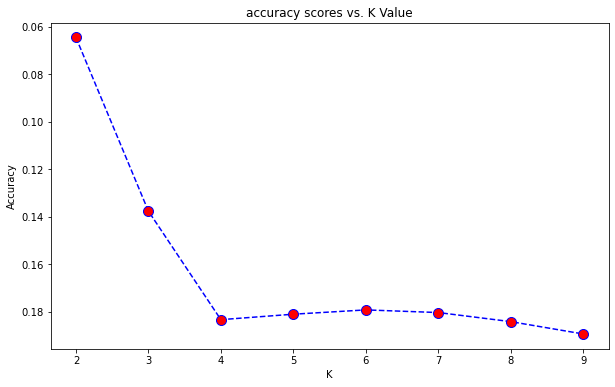

In [446]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [447]:
# Best value of k that balances complexity of the model vs accuracy
#is what would be the elbow if the graph was an arm. In this case,
#it would be approximately 4.

# Lab | Random variable distributions

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("../Day1/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Get the numerical variables from our dataset.

In [113]:
numericals = pd.DataFrame(data.select_dtypes(np.number))
numericals.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

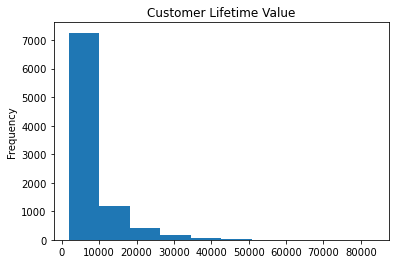

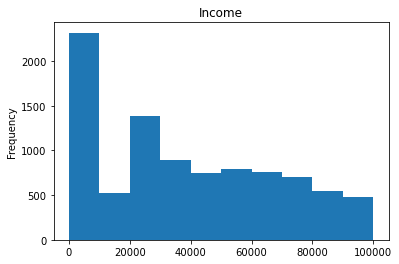

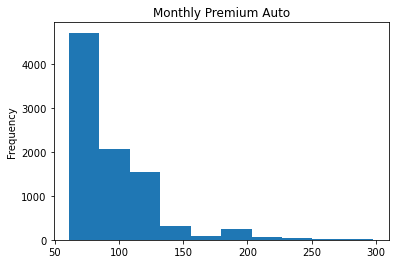

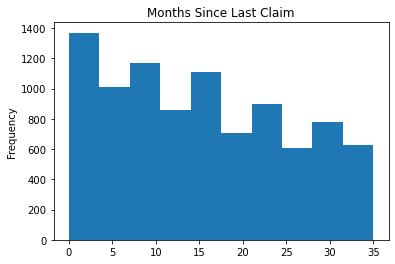

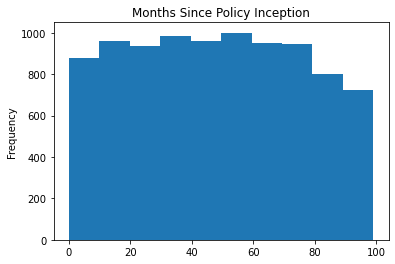

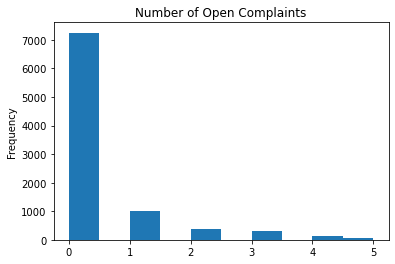

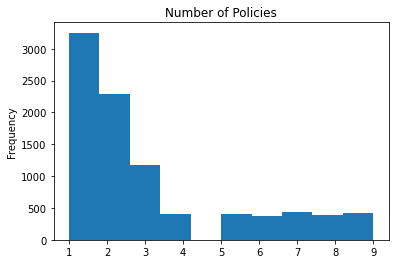

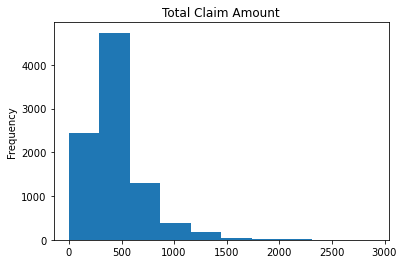

In [114]:
# Plot histograms
%matplotlib inline
num_names_cat = numericals.columns.tolist()
len(num_names_cat)
num_names_cat
def plot_cat(df):
    for i in range(len(num_names_cat)):
        plt.hist(df.iloc[:,i])
        plt.gca().set(title=num_names_cat[i], ylabel='Frequency')
        plt.show()
        
plot_cat(numericals)

None of the variables fit the Normal Distribution. However, almost all fit the Exponential distribution, these are:
- Customer Lifetime Value
- Income
- Monthly Premium Auto
- Months Since Last Claim
- Number of Open Complaints
- Number of Policies
- Total Claim Amount

Then, there is the 'Months Since Policy Inception' that almost fits the Uniform Distribution.

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [85]:
numericals.isnull().sum()/len(numericals)

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

In [116]:
# Log-transforming all numerical variables to check if the Distribution
#changes its form
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return x

In [117]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

<AxesSubplot:>

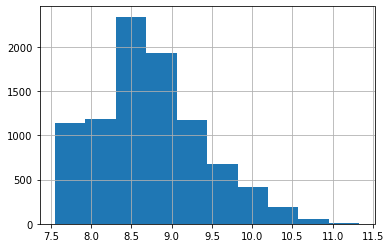

<AxesSubplot:>

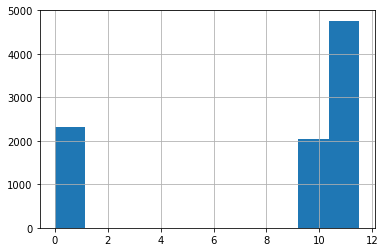

<AxesSubplot:>

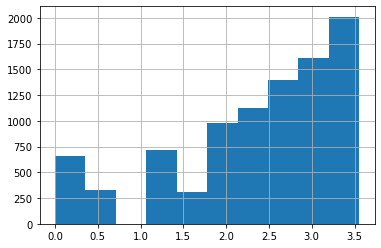

<AxesSubplot:>

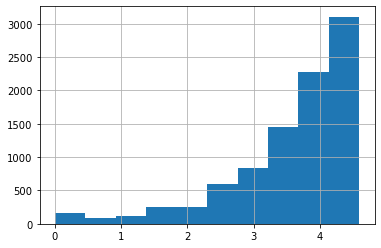

<AxesSubplot:>

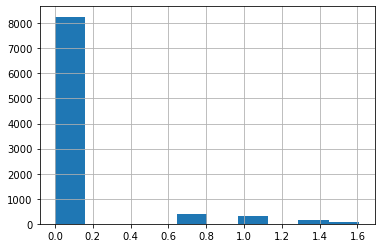

<AxesSubplot:>

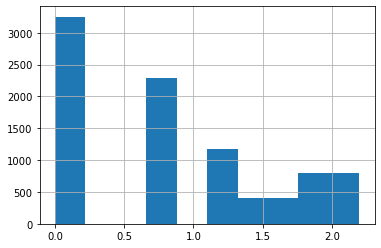

<AxesSubplot:>

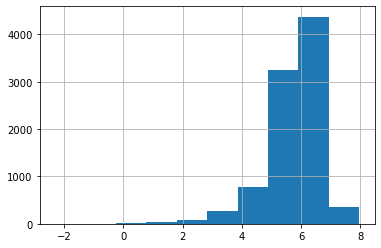

In [118]:
display(pd.Series(numericals['Customer Lifetime Value'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Income'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Monthly Premium Auto'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Months Since Last Claim'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Months Since Policy Inception'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Number of Open Complaints'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Number of Policies'].apply(log_transfom_clean)).hist())
plt.show()

display(pd.Series(numericals['Total Claim Amount'].apply(log_transfom_clean)).hist())
plt.show()

Applying the log-transformation, we can see how 'Customer Lifetime Value' and 'Total Claim Amount' variables become more like a Normal Distribution.

In [119]:
# Alternative: tranforming all numericals with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

numericals_n = pd.DataFrame(MinMaxScaler().fit_transform(numericals), columns=numericals.columns)

numericals_n.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


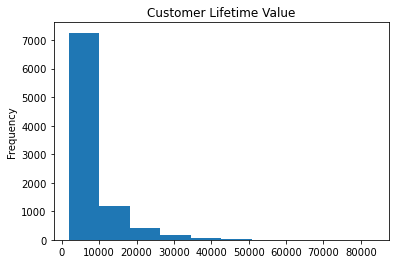

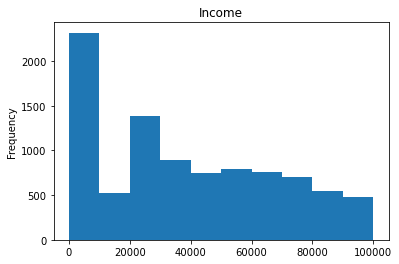

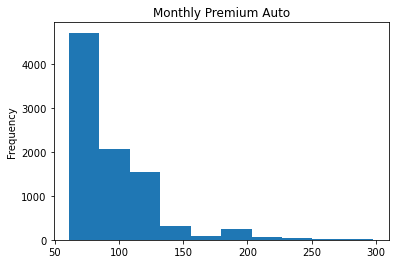

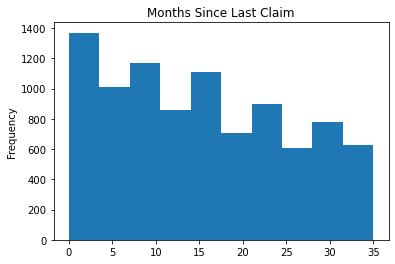

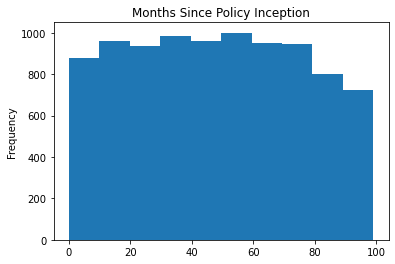

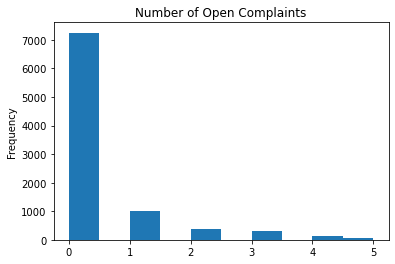

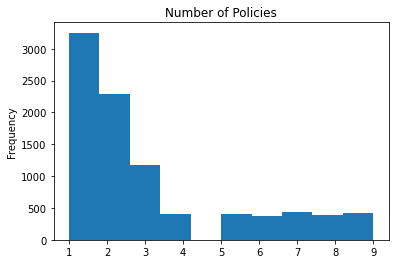

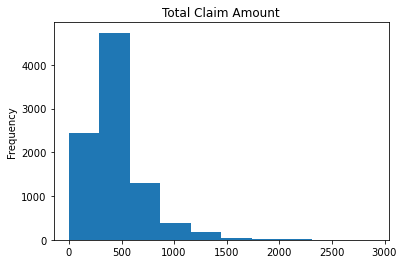

In [120]:
# Plotting its histograms to check if after Normalizing with MinMaxScaler
# the variables Distribution graphs have changed
%matplotlib inline
num_names_cat = numericals.columns.tolist()
len(num_names_cat)
num_names_cat
def plot_cat(df):
    for i in range(len(num_names_cat)):
        plt.hist(df.iloc[:,i])
        plt.gca().set(title=num_names_cat[i], ylabel='Frequency')
        plt.show()
        
plot_cat(numericals)

Nothing has changed from the first ploting.

In [91]:
# Another option: I will now replace 0s by the Mean so I may be able 
#to get closer to Normally Distributed numerical variables.

In [203]:
numericals = numericals.replace(0,numericals.mean())

In [204]:
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.000000,69,32.0,5.0,0.384388,2763.519279,2763.519279
1,6979.535903,37657.380009,94,13.0,42.0,0.384388,6979.535903,7309.839372
2,12887.431650,48767.000000,108,18.0,38.0,0.384388,12887.431650,12887.431650
3,7645.861827,37657.380009,106,18.0,65.0,0.384388,7645.861827,7645.861827
4,2813.692575,43836.000000,73,12.0,44.0,0.384388,2813.692575,2813.692575


In [205]:
numericals.isnull().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [106]:
numericals['Monthly Premium Auto']

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Monthly Premium Auto, Length: 9134, dtype: float64

In [93]:
numericals['Customer Lifetime Value'].value_counts()

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: Customer Lifetime Value, Length: 8041, dtype: int64

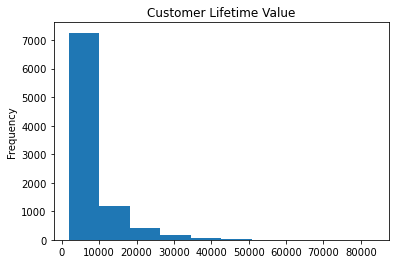

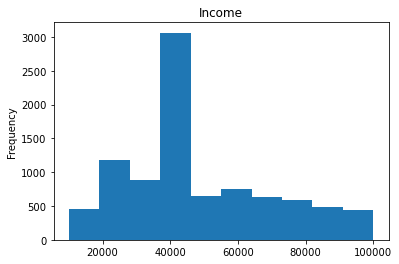

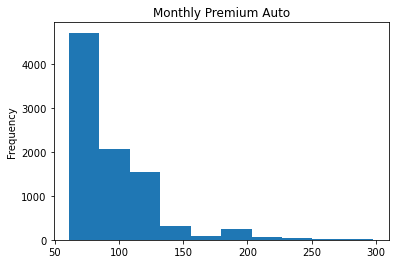

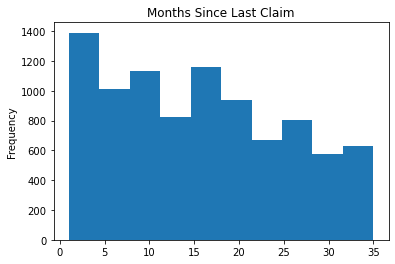

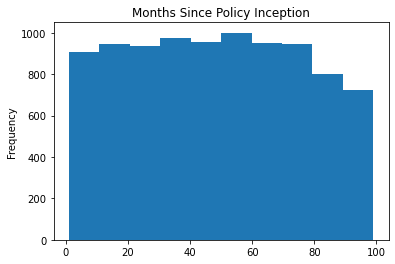

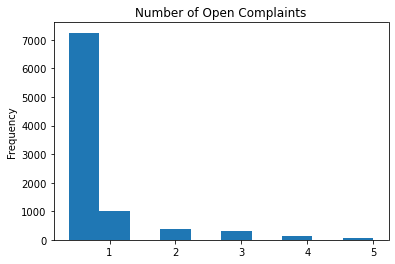

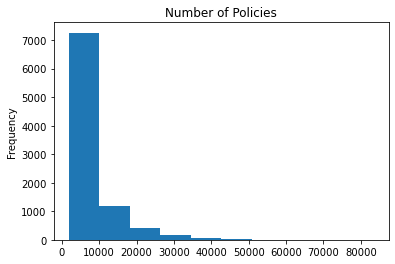

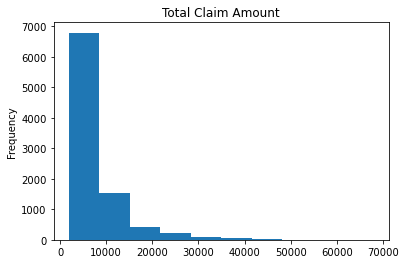

In [206]:
%matplotlib inline
num_names_cat = numericals.columns.tolist()
len(num_names_cat)
num_names_cat
def plot_cat(df):
    for i in range(len(num_names_cat)):
        plt.hist(df.iloc[:,i])
        plt.gca().set(title=num_names_cat[i], ylabel='Frequency')
        plt.show()
        
plot_cat(numericals)

By replacing the 0 values with the mean, we can see how the 'Income' variable has transformed into a more Normally distributed variable. It has not worked for the others.

In [95]:
# Removing outliers would probably help transforming the variables with
#Exponential Distribution into more of a Normally Distributed variables.

In [96]:
#def outliers(row):
    #iqr = np.percentile(row,75) - np.percentile(row,25)
   # upper_limit = np.percentile(row,75) + 1.5*iqr
  #  lower_limit = np.percentile(row,25) - 1.5*iqr 
 #   
#numericals[(numericals<upper_limit) & (numericals>lower_limit)]

In [97]:
#num_names_cat = numericals.columns.tolist()

#for i in range(len(num_names_cat)):x
    

In [180]:
numericals = pd.DataFrame(data.select_dtypes(np.number))

In [130]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [182]:
# I'll try to define a function to remove the outliers of every
#numerical variable

iqr = np.percentile(numericals['Number of Policies'],75) - np.percentile(numericals['Number of Policies'],25)

upper_limit = np.percentile(numericals['Number of Policies'],75) + 1.5*iqr
lower_limit = np.percentile(numericals['Number of Policies'],25) - 1.5*iqr       

print(upper_limit)
print(lower_limit)

8.5
-3.5


In [192]:
numericals['Number of Policies'] = numericals[(numericals['Number of Policies']>lower_limit)]

<AxesSubplot:>

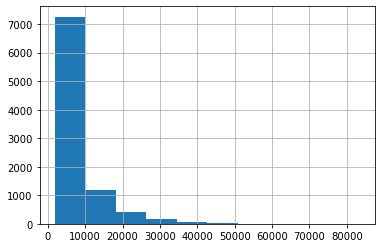

In [193]:
numericals['Number of Policies'].hist()

In [186]:
iqr = np.percentile(numericals['Total Claim Amount'],75) - np.percentile(numericals['Total Claim Amount'],25)

upper_limit = np.percentile(numericals['Total Claim Amount'],75) + 1.5*iqr
lower_limit = np.percentile(numericals['Total Claim Amount'],25) - 1.5*iqr       

print(upper_limit)
print(lower_limit)

960.3997301250002
-140.62664687500018


In [187]:
numericals['Total Claim Amount'] = numericals[(numericals['Total Claim Amount']<upper_limit) & (numericals['Total Claim Amount']>lower_limit)]

<AxesSubplot:>

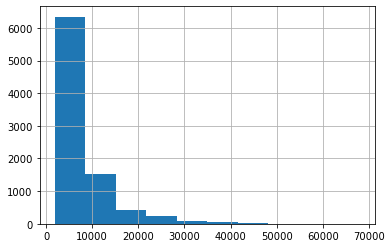

In [190]:
numericals['Total Claim Amount'].hist()

In [129]:
#numericals['Months Since Last Claim'] = numericals[(numericals['Months Since Last Claim']<upper_limit) & (numericals['Months Since Last Claim']>lower_limit)]

In [128]:
#numericals['Monthly Premium Auto'] = numericals[(numericals['Monthly Premium Auto']<upper_limit) & (numericals['Monthly Premium Auto']>lower_limit)]

In [133]:
#numericals['Months Since Policy Inception'] = numericals[(numericals['Months Since Policy Inception']<upper_limit) & (numericals['Months Since Policy Inception']>lower_limit)]